In [371]:
import pandas as pd 
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns 
import reverse_geocode
from bokeh.io import output_notebook,show
from bokeh.models import HoverTool
from bokeh.plotting import figure
from bokeh.palettes import Spectral4

import folium 
from folium import plugins
from folium.plugins import HeatMap


## Understanding data 

In [372]:
data = pd.read_csv('taxi.csv',sep=',')
data.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695


In [373]:
print(data.describe(),data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118185 entries, 0 to 118184
Data columns (total 11 columns):
id                    118185 non-null object
vendor_id             118185 non-null int64
pickup_datetime       118185 non-null object
dropoff_datetime      118185 non-null object
passenger_count       118185 non-null int64
pickup_longitude      118185 non-null float64
pickup_latitude       118185 non-null float64
dropoff_longitude     118185 non-null float64
dropoff_latitude      118185 non-null float64
store_and_fwd_flag    118185 non-null object
trip_duration         118185 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 9.9+ MB
           vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  118185.000000    118185.000000     118185.000000    118185.000000   
mean        1.534958         1.657148        -73.973971        40.751392   
std         0.498779         1.313844          0.040456         0.027958   
min         1.000000       

## Converting coordinates

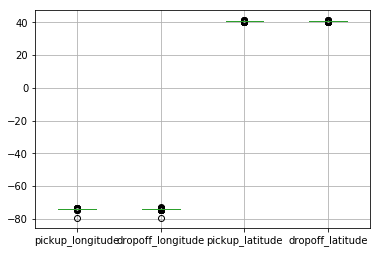

In [374]:
from geopy.geocoders import Nominatim

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)
#data['pickup district'] = data.apply(lambda row: geolocator.reverse((row['pickup_longitude'],row['pickup_latitude'])), axis=1)
data.boxplot(['pickup_longitude', 'dropoff_longitude', 'pickup_latitude', 'dropoff_latitude']);


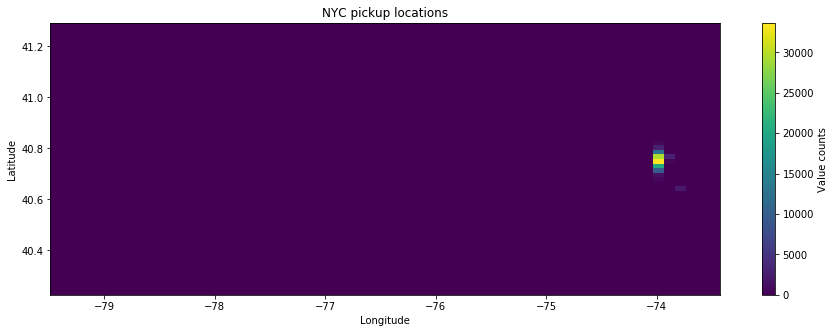

In [375]:
len(data.pickup_longitude[data.pickup_longitude < -70].values)
len(data.pickup_latitude[data.pickup_latitude < 50].values)

fig = plt.figure(1, figsize=(15,5))
hist = plt.hist2d(data.pickup_longitude, data.pickup_latitude, bins=60)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Value counts')
plt.title('NYC pickup locations')
plt.show()

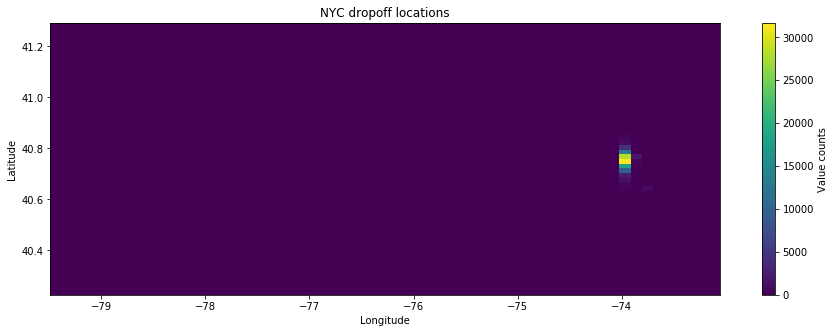

In [376]:
fig = plt.figure(1, figsize=(15,5))
hist = plt.hist2d(data.dropoff_longitude, data.dropoff_latitude, bins=60)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Value counts')
plt.title('NYC dropoff locations')
plt.show()

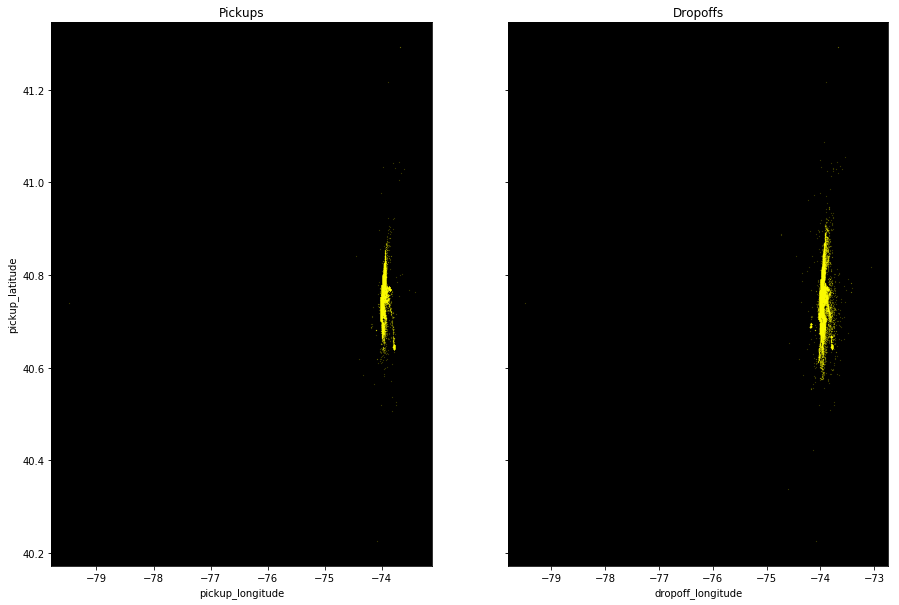

In [377]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,10))

data.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=False, ax=ax1)
ax1.set_title("Pickups")
ax1.set_facecolor('black')

data.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=False, ax=ax2)
ax2.set_title("Dropoffs")
ax2.set_facecolor('black') 

In [378]:
data['trip_duration'] = data['trip_duration']/60
data['trip_duration'] = round(data.trip_duration,2)
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,7.58
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,20.42
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,8.77
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,22.43
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,11.58
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,26.02
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,22.60
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,12.27
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,16.20
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,12.58


## Getting Distance as Km

In [379]:
from math import radians, sin, cos, sqrt, asin
def haversine(columns):
  lat1, lon1, lat2, lon2 = columns
  R = 6372.8 # Earth radius in kilometers
 
  dLat = radians(lat2 - lat1)
  dLon = radians(lon2 - lon1)
  lat1 = radians(lat1)
  lat2 = radians(lat2)
 
  a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
  c = 2*asin(sqrt(a))
 
  return R * c
cols = ['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']
distances = data[cols].apply(
    lambda x: haversine(x),axis = 1
)
data['distance'] = distances.copy()
data['distance'] = round(data.distance,2)
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,7.58,1.50
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,20.42,5.12
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,8.77,1.49
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,22.43,1.97
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,11.58,2.52


In [380]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['pu_hour'] = data['pickup_datetime'].dt.hour
data['pu_day'] = data['pickup_datetime'].dt.dayofyear
data['pu_wday'] = data['pickup_datetime'].dt.dayofweek
data['pu_month'] = data['pickup_datetime'].dt.month
data


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pu_hour,pu_day,pu_wday,pu_month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,7.58,1.50,17,74,0,3
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,20.42,5.12,21,70,3,3
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,8.77,1.49,7,71,4,3
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,22.43,1.97,14,74,0,3
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,11.58,2.52,15,74,0,3
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,26.02,4.00,20,72,5,3
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,22.60,4.26,20,62,2,3
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,12.27,0.73,13,69,2,3
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,16.20,2.21,22,63,3,3
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,12.58,2.91,4,74,0,3


## Time of Day And Average distance

In [381]:
rush_hour_morning = data[(data['pu_hour'] >= 7) & (data['pu_hour'] < 9)]
afternoon = data[(data['pu_hour'] >= 9) & (data['pu_hour'] < 16)]
rush_hour_evening = data[(data['pu_hour'] >= 16) & (data['pu_hour'] < 18)]
evening = data[(data['pu_hour'] >= 18) & (data['pu_hour'] <= 23)]
latenight =data[(data['pu_hour'] >=0 ) & (data['pu_hour'] < 7)]

print("7am and 9 am average distance :",rush_hour_morning.distance.mean(),
"9am and 4 P.M average distance :",afternoon.distance.mean(),
"4 PM and 6 PM average distance : ",rush_hour_evening.distance.mean(),
"6 pm and 11pm average distance :",evening.distance.mean(),
"11pm and 7 am average distance :",latenight.distance.mean(),)



7am and 9 am average distance : 3.127806248152167 9am and 4 P.M average distance : 3.109406319178912 4 PM and 6 PM average distance :  3.3421151850570667 6 pm and 11pm average distance : 3.4640183377989184 11pm and 7 am average distance : 4.152537248301216


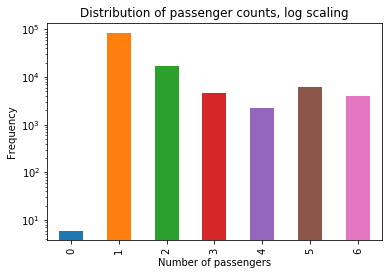

In [382]:
passengers = data['passenger_count'].value_counts().sort_index()
passengers.plot(kind = 'bar',logy = True)
plt.xlabel('Number of passengers')
plt.ylabel('Frequency')
plt.title('Distribution of passenger counts, log scaling')
plt.show()

## Trip duration for part of day time 

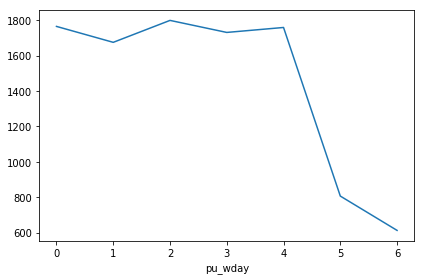

In [383]:
byWday = rush_hour_morning.groupby('pu_wday').count()['trip_duration']
byWday.plot()
plt.tight_layout()


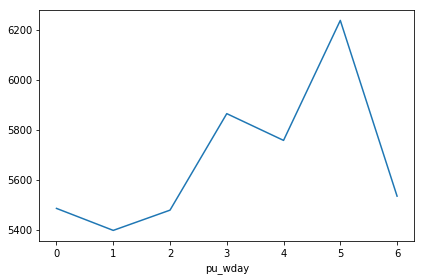

In [384]:
byWday = afternoon.groupby('pu_wday').count()['trip_duration']
byWday.plot()
plt.tight_layout()

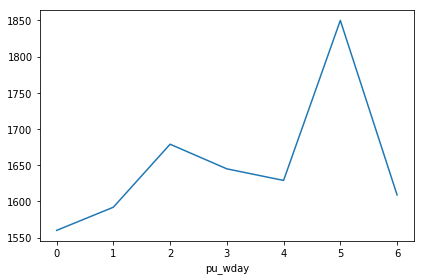

In [385]:
byWday = rush_hour_evening.groupby('pu_wday').count()['trip_duration']
byWday.plot()
plt.tight_layout()

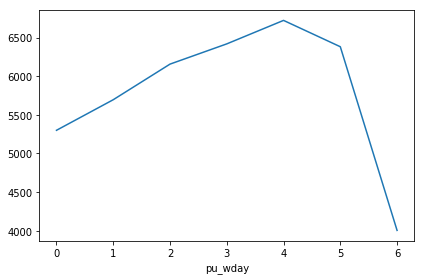

In [386]:
byWday = evening.groupby('pu_wday').count()['trip_duration']
byWday.plot()
plt.tight_layout()

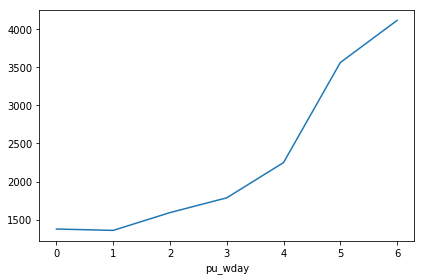

In [387]:
byWday = latenight.groupby('pu_wday').count()['trip_duration']
byWday.plot()
plt.tight_layout()

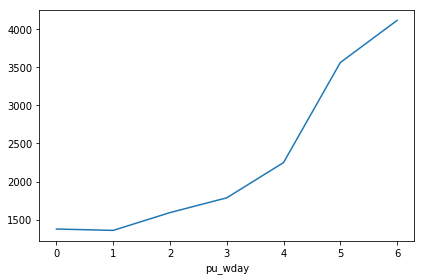

In [388]:
byWday = latenight.groupby('pu_wday').count()['distance']
byWday.plot()
plt.tight_layout()

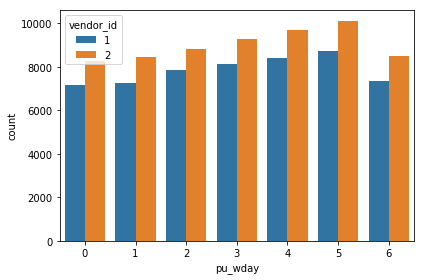

In [389]:
sns.countplot(x='pu_wday',data=data,hue='vendor_id')
plt.tight_layout()

In [390]:
data.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,pu_hour,pu_day,pu_wday,pu_month
vendor_id,1.000000,0.293623,0.011391,0.007838,0.003093,0.006378,0.034313,0.003386,0.006225,0.001355,0.000740,NaN
passenger_count,0.293623,1.000000,-0.004414,-0.001269,-0.002280,-0.003409,0.019178,0.005971,0.010643,0.011070,0.026024,NaN
pickup_longitude,0.011391,-0.004414,1.000000,-0.101032,0.384399,0.052744,0.064542,0.455726,0.020468,0.006567,-0.029134,NaN
pickup_latitude,0.007838,-0.001269,-0.101032,1.000000,0.060402,0.443818,-0.048825,-0.299748,0.012578,-0.013965,-0.032821,NaN
dropoff_longitude,0.003093,-0.002280,0.384399,0.060402,1.000000,0.126132,0.040602,0.329405,-0.037757,0.010219,-0.002487,NaN
dropoff_latitude,0.006378,-0.003409,0.052744,0.443818,0.126132,1.000000,-0.043374,-0.156326,0.021118,-0.011590,-0.029997,NaN
trip_duration,0.034313,0.019178,0.064542,-0.048825,0.040602,-0.043374,1.000000,0.163717,0.003835,0.004271,-0.000313,NaN
distance,0.003386,0.005971,0.455726,-0.299748,0.329405,-0.156326,0.163717,1.000000,-0.013594,0.019735,0.014692,NaN
pu_hour,0.006225,0.010643,0.020468,0.012578,-0.037757,0.021118,0.003835,-0.013594,1.000000,-0.032894,-0.093140,NaN
pu_day,0.001355,0.011070,0.006567,-0.013965,0.010219,-0.011590,0.004271,0.019735,-0.032894,1.000000,0.115595,NaN


## conclusion

--There is no correlation between group size and distance
---latenight trip has an effect on distance